In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/train.csv


In [24]:
import numpy as np 
import tensorflow as tf
%matplotlib inline
from matplotlib import pyplot as plt # to view digits images from array object
from keras import  backend as K
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
# import tensorflow_addons as tfa
from keras.models import  Sequential
from keras.layers.core import  Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from livelossplot import PlotLossesKerasTF
from keras.layers import BatchNormalization, Conv2D , MaxPooling2D ,Activation
# from keras.optimizers import Adam , RMSprop
from keras.optimizers import adam_v2
# from tensorflow.keras.optimizers import Adam

In [9]:
train_set = pd.read_csv('data/train.csv')
# test_set = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

img_col = 28
img_row = 28

In [10]:
train_set.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_train_df = train_set.drop(['label'],axis = 1)
y_train_df = train_set['label']
# X_test_df = test_set

X_tr = np.asarray(X_train_df)/255
y_tr = np.asarray(y_train_df)
# X_te = np.asarray(X_test_df)/255
print(type(X_tr))
print(X_tr.shape)
# print(X_te.shape)

<class 'numpy.ndarray'>
(42000, 784)


In [12]:
train_set['label'].value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

In [14]:
X_trainplot = X_tr.reshape(42000 , img_col , img_row)
# X_testplot = X_te.reshape(28000, img_col,img_row)
print(X_trainplot.shape)
# print(X_testplot.shape)

(42000, 28, 28)


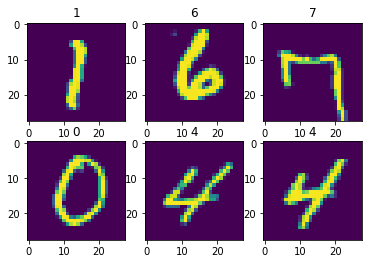

In [16]:
rand_img = np.random.randint(42000,size = 6)
fig = plt.figure()

for i,idx in enumerate(rand_img,1):
    arr1 = X_trainplot[idx]
    ax1 = fig.add_subplot(2,3,i)
    ax1.imshow(arr1 )
    ax1.set_title(y_tr[idx])
    
# rand_img = np.random.randint(28000,size = 3)
# for i,idx in enumerate(rand_img,4):
#     arr1 = X_testplot[idx]
#     ax1 = fig.add_subplot(2,3,i)
#     ax1.imshow(arr1 )


In [18]:
X_train_f = X_tr.reshape(42000,img_col,img_row,1)
# X_test_f= X_te.reshape(28000,img_col,img_row,1)
y_train_f = to_categorical(y_tr)
y_train_f.shape[1]

10

In [29]:
model = Sequential()

model.add(Conv2D(128,(2,2),padding = 'same', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,(2,2),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64,(2,2),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.15))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
# model.add(Dropout(0.15))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(10 , activation = 'softmax'))

In [30]:
# init_lr = 1e-2
# decay_steps = 150
# alpha = 1e-5
# beta = 1e-8
# num_periods=4
# lin_cos_dec1 = tf.keras.experimental.LinearCosineDecay(init_lr,
#                                                        decay_steps,
#                                                        num_periods=num_periods, alpha=alpha,
#                                                        beta=beta, name='LinCosDec 1')

In [31]:
opt = adam_v2.Adam(learning_rate=0.00005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 128)       640       
_________________________________________________________________
batch_normalization_16 (Batc (None, 28, 28, 128)       512       
_________________________________________________________________
activation_16 (Activation)   (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)       65664     
_________________________________________________________________
batch_normalization_17 (Batc (None, 14, 14, 128)       512       
_________________________________________________________________
activation_17 (Activation)   (None, 14, 14, 128)      

In [32]:
epochs = 150
batch_size = 64

X_train, X_val, y_train, y_val = train_test_split(X_train_f, y_train_f, test_size=0.3 , random_state = 5)
image_gen = ImageDataGenerator(rotation_range = 25 ,shear_range = 0.25,zoom_range = [1.25,0.75],width_shift_range= 0.1,height_shift_range=0.1)
image_gen2 = ImageDataGenerator()
train_batches = image_gen.flow(X_train,y_train,batch_size = batch_size)
val_batches =image_gen2.flow(X_val,y_val,batch_size = batch_size)

In [36]:
steps_per_epoch = train_batches.n//train_batches.batch_size
validation_steps = val_batches.n//val_batches.batch_size
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.75,patience=3, min_lr=0.00001, mode='auto',verbose=1)
callbacks = [PlotLossesKerasTF(), reduce_lr]

In [38]:
history=model.fit_generator(generator=train_batches, steps_per_epoch = steps_per_epoch, epochs=epochs, 
                    validation_data=val_batches, validation_steps=validation_steps , callbacks=callbacks)

Epoch 1/200
157/459 [=========>....................] - ETA: 1:33 - loss: 2.2234 - accuracy: 0.2268

KeyboardInterrupt: 

In [ ]:
predictions = model.predict_classes(X_test_f, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("mysub5.csv", index=False, header=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [ ]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (y_pred_classes - y_true != 0)
print(sum(errors))
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
y_pred_errors_prob = np.max(y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[:6]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, y_pred_classes_errors, y_true_errors)